In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import matplotlib
from numba import njit 
import scienceplots
plt.style.use(['science'])
plt.rcParams.update({'font.size': 20, 'font.weight': 'bold', 'font.family': 'sans-serif'})

In [68]:
@njit
def twoD_brownian_motion(nsteps, dt, D):
    """Simulate 2D Brownian motion."""
    # Generate random steps
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    for i in range(nsteps):
        x[i] = x[i-1] + np.random.normal(0, np.sqrt(2 * D * dt))
        y[i] = y[i-1] + np.random.normal(0, np.sqrt(2 * D * dt))

    return x, y
@njit
def disc_diff(omega,r,dt,D,nsteps,ini):
    """Simulate diffusion of a disc in a circular domain."""
    x = np.zeros(nsteps)
    y = np.zeros(nsteps)
    x0 = np.zeros(nsteps)
    y0 = np.zeros(nsteps)
    x[0], y[0] = r, 0  # Start at (r0, 0)
    x0[0], y0[0] = ini[0], ini[1]

    for i in range(1, nsteps):
        # Brownian step
        dx = np.random.normal(0, np.sqrt(2 * D * dt))
        dy = np.random.normal(0, np.sqrt(2 * D * dt))
        x0[i] = x0[i-1] + dx
        y0[i] = y0[i-1] + dy
        x[i] = x[i-1] + dx - r*omega*dt*np.sin(omega*dt*i)
        y[i] = y[i-1] + dy + r*omega*dt*np.cos(omega*dt*i)
        
    return x, y, x0, y0

In [386]:
dt = 0.001
T_e = 1
nsteps = int(T_e/dt)
D = 0.04  # Diffusion coefficient
omega = 2 * np.pi  # Angular velocity
r = 1.0  # Radius of the circular domain
ini = [0.0, 0.0]  # Initial position of the disc
xb, yb = twoD_brownian_motion(nsteps, dt, D)
x,y,x0,y0 = disc_diff(omega,r,dt,D,nsteps,ini)

vx,vy = velocities(x,y,dt)
l = angular_momentum(x[:-1],y[:-1],vx,vy)
np.mean(l), np.std(l, ddof=1)

(np.float64(5.795016189136649), np.float64(9.275667673286527))

Text(0, 0.5, 'y')

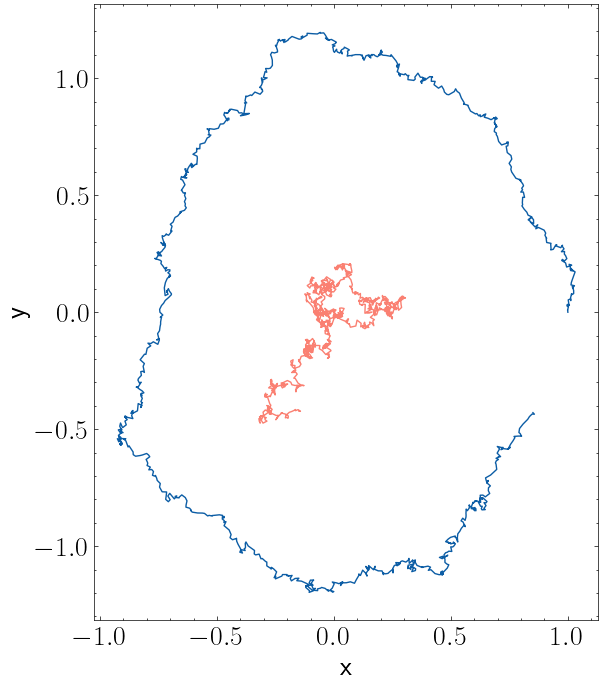

In [387]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

ax.set_aspect('equal')
ax.plot(x, y, lw=1)
ax.plot
ax.plot(x0, y0, lw=1,c = 'salmon')
ax.set_xlabel('x')
ax.set_ylabel('y')

In [388]:
Runs = 200000
prob_dist = np.zeros((Runs,2))
prob_dist_diff = np.zeros((Runs,2)) 

probstdev = np.zeros(Runs)
for i in range(Runs):
    x,y,x0,y0 = disc_diff(omega,r,dt,D,nsteps,ini)
    print(f'Run {i+1}/{Runs}')
    prob_dist[i] = [x[-1], y[-1]]
    prob_dist_diff[i] = [r+x0[-40], y0[-40]]

Run 1/200000
Run 2/200000
Run 3/200000
Run 4/200000
Run 5/200000
Run 6/200000
Run 7/200000
Run 8/200000
Run 9/200000
Run 10/200000
Run 11/200000
Run 12/200000
Run 13/200000
Run 14/200000
Run 15/200000
Run 16/200000
Run 17/200000
Run 18/200000
Run 19/200000
Run 20/200000
Run 21/200000
Run 22/200000
Run 23/200000
Run 24/200000
Run 25/200000
Run 26/200000
Run 27/200000
Run 28/200000
Run 29/200000
Run 30/200000
Run 31/200000
Run 32/200000
Run 33/200000
Run 34/200000
Run 35/200000
Run 36/200000
Run 37/200000
Run 38/200000
Run 39/200000
Run 40/200000
Run 41/200000
Run 42/200000
Run 43/200000
Run 44/200000
Run 45/200000
Run 46/200000
Run 47/200000
Run 48/200000
Run 49/200000
Run 50/200000
Run 51/200000
Run 52/200000
Run 53/200000
Run 54/200000
Run 55/200000
Run 56/200000
Run 57/200000
Run 58/200000
Run 59/200000
Run 60/200000
Run 61/200000
Run 62/200000
Run 63/200000
Run 64/200000
Run 65/200000
Run 66/200000
Run 67/200000
Run 68/200000
Run 69/200000
Run 70/200000
Run 71/200000
Run 72/200000
R

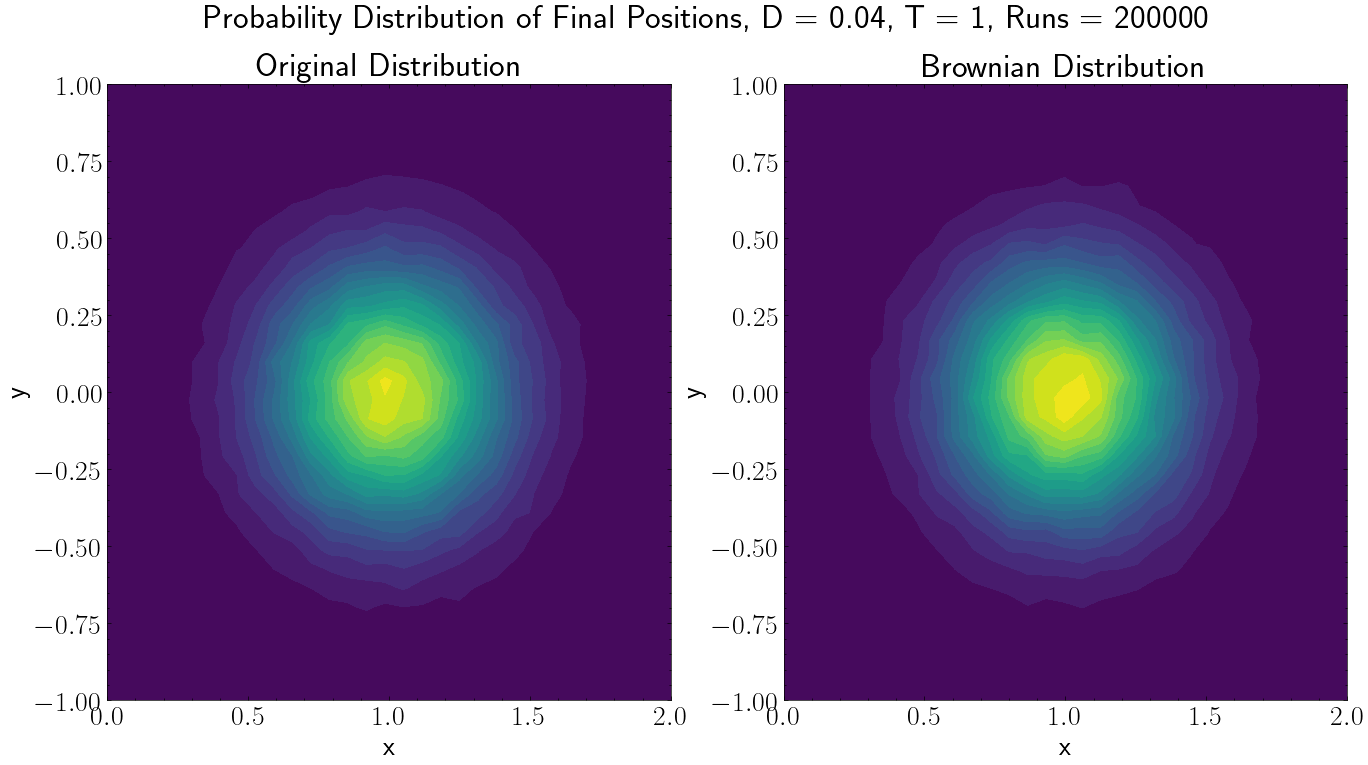

In [391]:
# Extract coordinates
xd = prob_dist[:, 0]
yd = prob_dist[:, 1]

x0d = prob_dist_diff[:, 0]
y0d = prob_dist_diff[:, 1]



# Define grid boundaries (adjust based on your data range)
nbins = 40
x_edges = np.linspace(xd.min(), xd.max(), nbins + 1)
y_edges = np.linspace(yd.min(), yd.max(), nbins + 1)

x0_edges = np.linspace(x0d.min(), x0d.max(), nbins + 1)
y0_edges = np.linspace(y0d.min(), y0d.max(), nbins + 1)

# Compute 2D histogram (counts)
H, x_edges, y_edges = np.histogram2d(xd, yd, bins=[x_edges, y_edges])
H0, x0_edges, y0_edges = np.histogram2d(x0d, y0d, bins=[x0_edges, y0_edges])
# For contour, we need the bin centers
x_centers = (x_edges[:-1] + x_edges[1:]) / 2
y_centers = (y_edges[:-1] + y_edges[1:]) / 2
x0_centers = (x0_edges[:-1] + x0_edges[1:]) / 2
y0_centers = (y0_edges[:-1] + y0_edges[1:]) / 2

X, Y = np.meshgrid(x_centers, y_centers)
X0, Y0 = np.meshgrid(x0_centers, y0_centers)

t =1
# Plot filled contours
fig,axes = plt.subplots(1,2,figsize=(16, 8))
axes[0].contourf(X, Y, H.T, levels=20, cmap='viridis')
axes[0].set_xlabel('x')
axes[0].set_xlim(r-t, r+t)
axes[0].set_ylim(-t, t )
axes[0].set_ylabel('y')
axes[0].set_title('Original Distribution')

axes[1].contourf(X0, Y0, H0.T, levels=20, cmap='viridis')
axes[1].set_xlabel('x')
axes[1].set_xlim(r-t, r+t)
axes[1].set_ylim(-t, t )
axes[1].set_ylabel('y')
axes[1].set_title('Brownian Distribution')
fig.suptitle(f'Probability Distribution of Final Positions, D = {D}, T = {T_e}, Runs = {Runs}')


fig.savefig('images/discdiff/probdist_2.png', dpi=300)


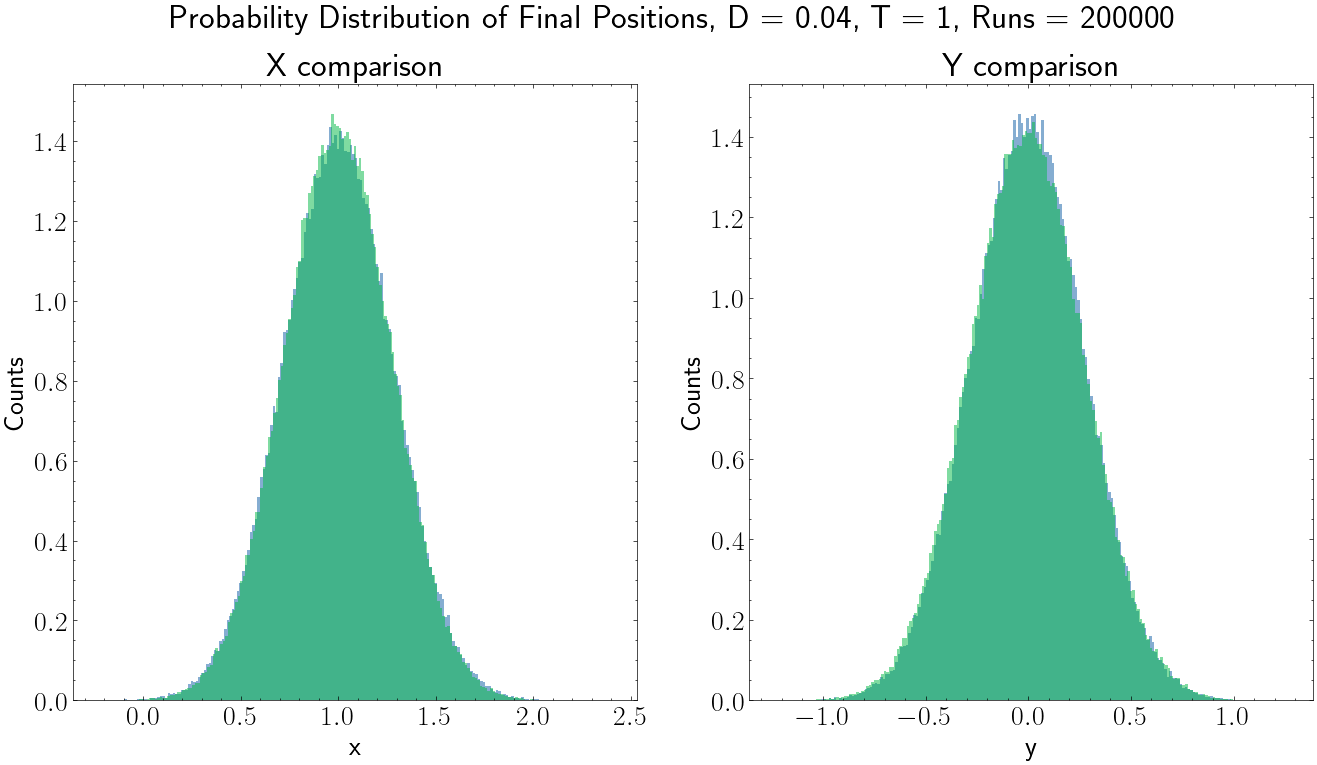

In [394]:

fig,axes = plt.subplots(1,2,figsize=(16, 8))
axes[0].hist(xd,density=True, bins=200, alpha=0.5)
axes[0].hist(x0d,density=True, bins=200, alpha=0.5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('Counts')
# axes[0].legend()
axes[0].set_title('X comparison')

axes[1].hist(y0d,density=True, bins=200, alpha=0.5)
axes[1].hist(yd,density=True, bins=200, alpha=0.5)
axes[1].set_xlabel('y')
axes[1].set_ylabel('Counts')
# axes[1].legend()Average
axes[1].set_title('Y comparison')
fig.suptitle(f'Probability Distribution of Final Positions, D = {D}, T = {T_e}, Runs = {Runs}')
fig.savefig('images/discdiff/probdist_ind_2.png', dpi=300)



In [395]:
Runs = 200000
avgl = 0
dt = 0.001
T_e = 3
nsteps = int(T_e/dt)
L = np.zeros(nsteps-1)
Lstdev1 = np.zeros(nsteps-1)
for i in range(Runs):
    x,y,x0,y0 = disc_diff(omega,r,dt,D,nsteps,ini)
    vx,vy = velocities(x,y,dt)
    l = angular_momentum(x[:-1],y[:-1],vx,vy)
    L += l
    Lstdev1 += l**2
L /= Runs
Lstdev1 = np.sqrt(Lstdev1/Runs - L**2)

In [376]:
times = np.linspace(0, T_e, nsteps-1)

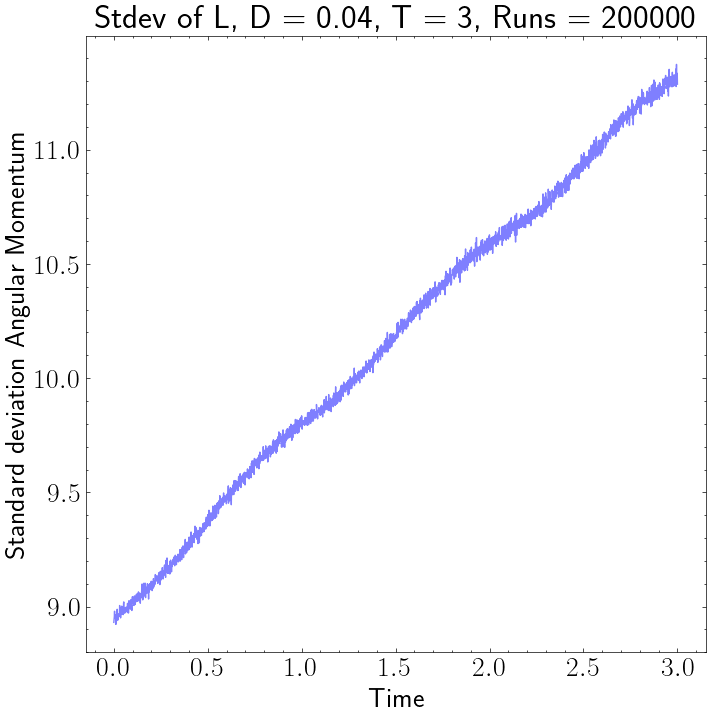

In [397]:
plt.figure(figsize=(8, 8))
# plt.plot(time[:-1], L, 'b-', alpha=0.7, lw=1);
# plt.plot(time[:-1], Lstdev, color='black', alpha=0.5, label=f'D = {40}')
plt.plot(times, Lstdev1, color='b', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Standard deviation Angular Momentum')
plt.title(f'Stdev of L, D = {D}, T = {T_e}, Runs = {Runs}')

# fig.savefig('images/discdiff/avgl_1.png', dpi=300            )
plt.savefig('images/discdiff/stdl_4.png', dpi=300            )

In [231]:
from scipy import stats

In [305]:
laplace = stats.laplace
cauchy = stats.cauchy
norm = stats.norm
laplacefit = stats.fit(laplace,L,[(-1000, 1000), (0, 5000)])
cauchyfit = stats.fit(cauchy,L,[(-1000, 1000), (0, 5000)])
normfit = stats.fit(norm,L,[(-1000, 1000), (0, 5000)])
laploc = laplacefit.params[0]
lapscale = laplacefit.params[1]
cauchyloc = cauchyfit.params[0]
cauchyscale = cauchyfit.params[1]
normloc = normfit.params[0]
normscale = normfit.params[1]

laplacefit.success, cauchyfit.success, normfit.success, laplacefit.params

(True, True, True, FitParams(loc=np.float64(1000.0), scale=np.float64(5000.0)))

In [291]:
xdata = np.linspace(min(L), max(L), 1000)
pdf_fitted = cauchy.pdf(xdata,loc= cauchyloc,scale = cauchyscale)
pdf_fitted1 = stats.norm.pdf(xdata,loc =normloc,scale = normscale)
pdf_fitted2 = stats.laplace.pdf(xdata,loc = laploc,scale = lapscale )

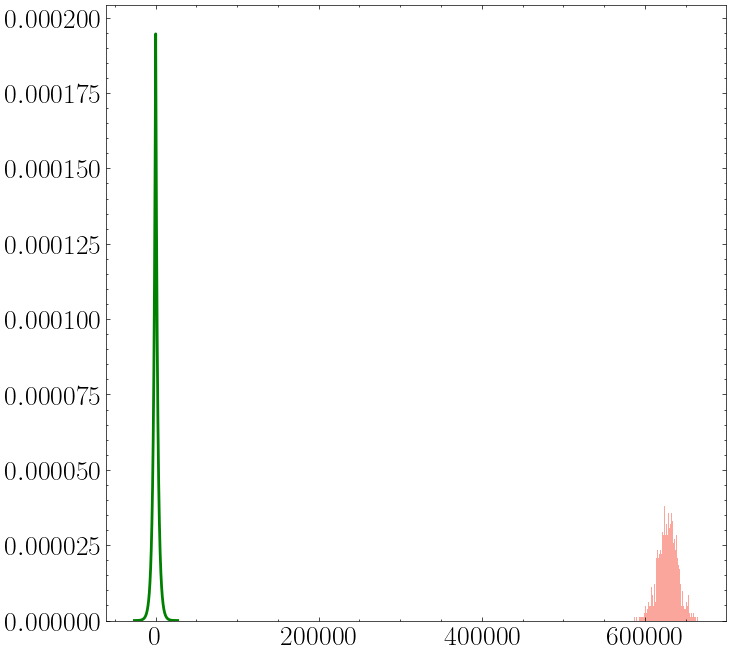

In [306]:
plt.figure(figsize=(8, 8))
plt.hist(L, bins=100, density=True, alpha=0.7, color='salmon');
# plt.plot(xdata, pdf_fitted, 'b-', lw=2, label='Fitted Cauchy PDF')
# plt.plot(xdata, pdf_fitted1, 'k-', lw=2, label='Fitted Normal PDF')
plt.plot(xdata, pdf_fitted2, 'g-', lw=2, label='Fitted Laplace PDF')

In [214]:
time = np.arange(0,nsteps)*dt

Text(0, 0.5, 'y')

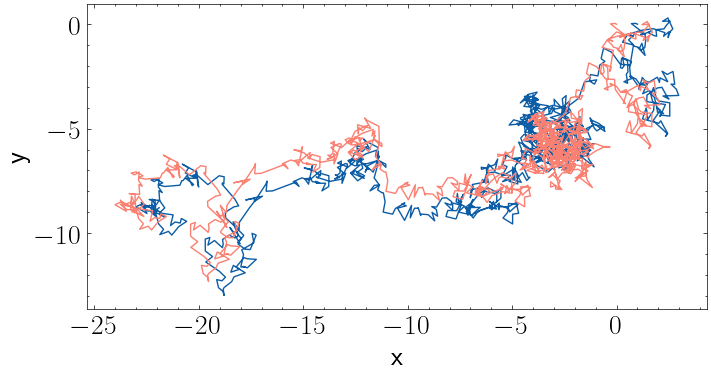

In [ ]:

# ax.set_xlim(-1.15, 1.15)
# ax.set_ylim(-1.15,1.15)


Generating simple animation...
Frame 1/1000
Frame 1/1000
Frame 1/1000
Frame 1/1000
Frame 2/1000
Frame 3/1000
Frame 4/1000
Frame 5/1000
Frame 6/1000
Frame 7/1000
Frame 8/1000
Frame 9/1000
Frame 10/1000
Frame 11/1000
Frame 12/1000
Frame 13/1000
Frame 14/1000
Frame 15/1000
Frame 16/1000
Frame 17/1000
Frame 18/1000
Frame 19/1000
Frame 20/1000
Frame 21/1000
Frame 22/1000
Frame 23/1000
Frame 24/1000
Frame 25/1000
Frame 26/1000
Frame 27/1000
Frame 28/1000
Frame 29/1000
Frame 30/1000
Frame 31/1000
Frame 32/1000
Frame 33/1000
Frame 34/1000
Frame 35/1000
Frame 36/1000
Frame 37/1000
Frame 38/1000
Frame 39/1000
Frame 40/1000
Frame 41/1000
Frame 42/1000
Frame 43/1000
Frame 44/1000
Frame 45/1000
Frame 46/1000
Frame 47/1000
Frame 48/1000
Frame 49/1000
Frame 50/1000
Frame 51/1000
Frame 52/1000
Frame 53/1000
Frame 54/1000
Frame 55/1000
Frame 56/1000
Frame 57/1000
Frame 58/1000
Frame 59/1000
Frame 60/1000
Frame 61/1000
Frame 62/1000
Frame 63/1000
Frame 64/1000
Frame 65/1000
Frame 66/1000
Frame 67/1000


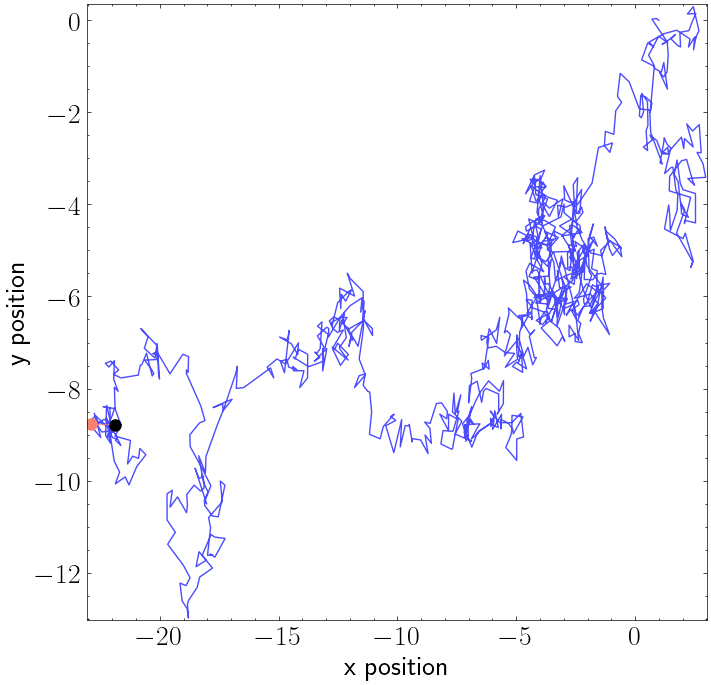

In [221]:
# Create the figure and axis
print("\nGenerating simple animation...")
fig_simple, ax_simple = plt.subplots(figsize=(8, 8))
ax_simple.set_xlim(x.min() - 0.05, x.max() + 0.05)
ax_simple.set_ylim(y.min() - 0.05, y.max() + 0.05)
ax_simple.set_xlabel('x position')
ax_simple.set_ylabel('y position')
# contour_lines_simple = ax_simple.contour(X, Y, Z, levels=30, colors='black', alpha=0.3, linewidths=0.5)
# ax_simple.set_title('Brownian Gyrator Trajectory Animation')
# ax_simple.grid(True, alpha=0.3)
# ax_simple.set_aspect('equal', adjustable='datalim')

line, = ax_simple.plot([], [], 'b-', alpha=0.7, lw=1)
line1, = ax_simple.plot([], [], c='salmon', alpha=0.7, lw=1)
point, = ax_simple.plot([], [], 'ko', markersize=8)
point0, = ax_simple.plot([], [], 'o', color='salmon', markersize=8)

def update_simple(frame):
    line.set_data(x[:frame+1], y[:frame+1])
    line1.set_data([x0[frame],x[frame]], [y0[frame],y[frame]])
    point.set_data([x[frame]], [y[frame]])
    point0.set_data([x0[frame]], [y0[frame]])
    # ax_simple.set_title(f'Brownian Gyrator Trajectory\nTime: {time[frame]:.2f}, Step: {frame}')
    print(f'Frame {frame+1}/{nsteps}')
    return line, line1, point, point0

ani_simple = FuncAnimation(fig_simple, update_simple, frames=nsteps, interval=20, blit=True)
ani_simple.save('images/discdiff/test4.mp4', writer='ffmpeg', dpi=300)

Text(0, 0.5, 'Angular Momentum')

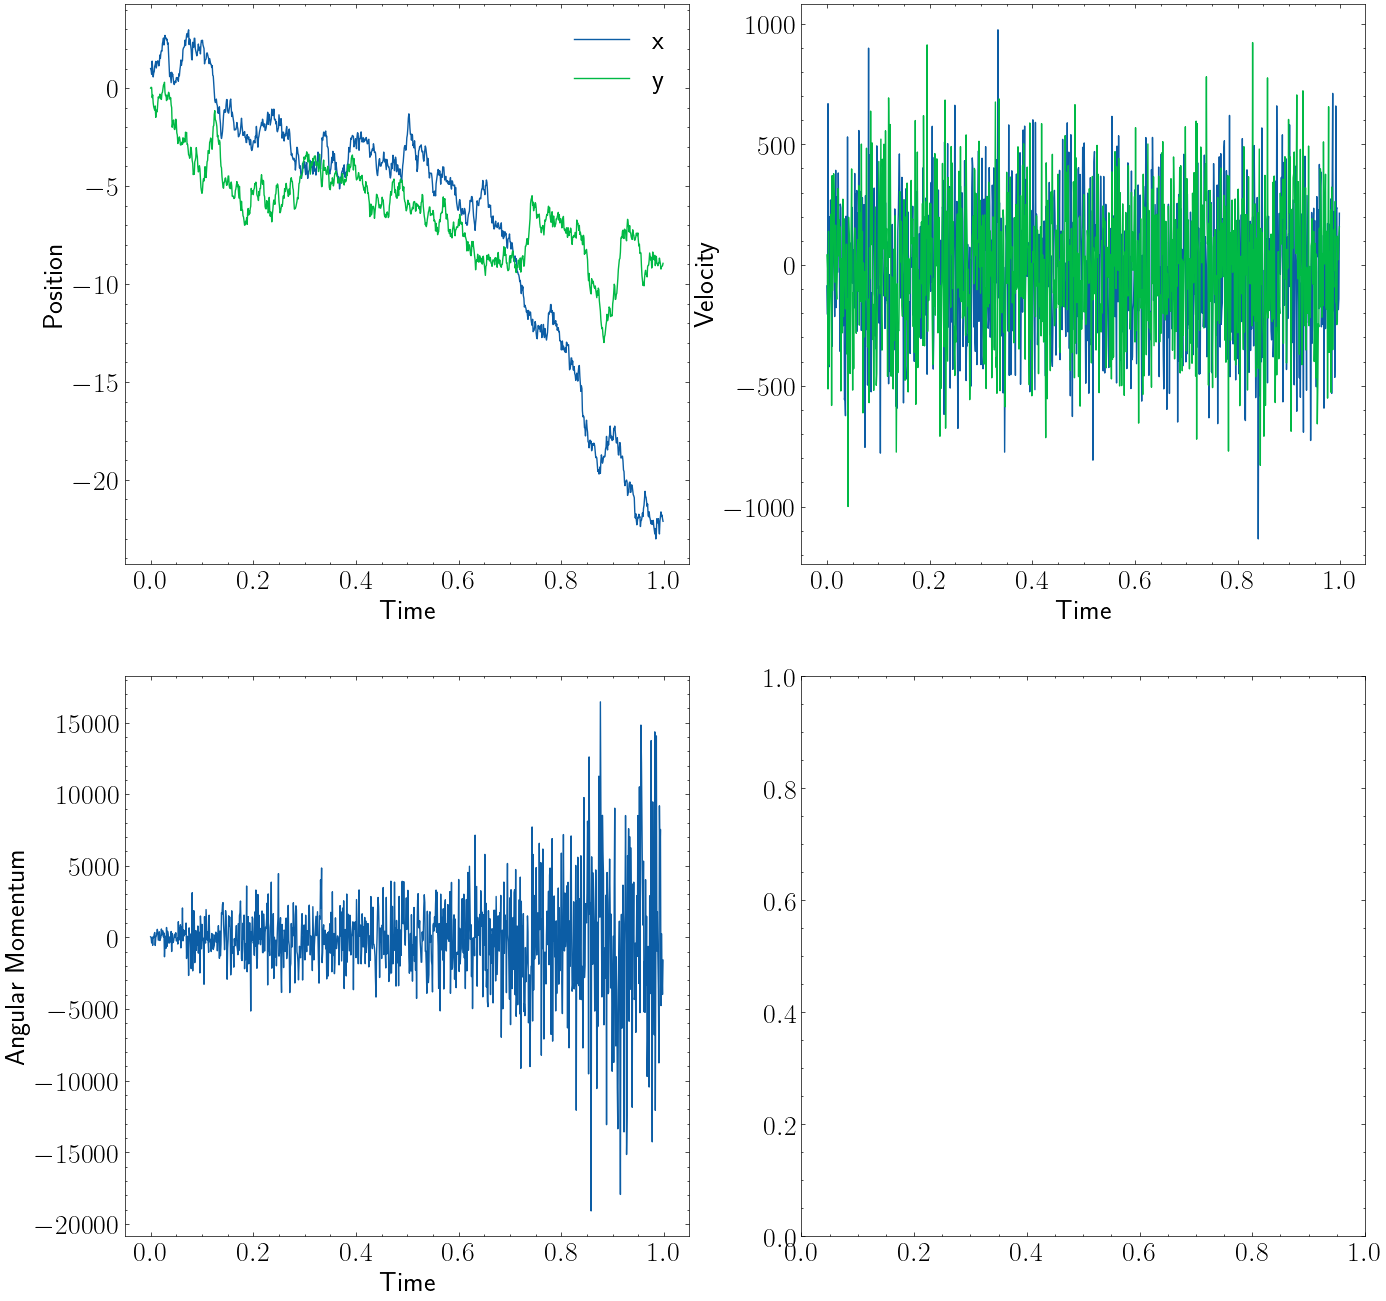

In [222]:
fig,axes = plt.subplots(2,2,figsize=(16,16))

ax = axes[0,0]
ax.plot(time[:-1], x[:-1], label='x')
ax.plot(time[:-1], y[:-1], label='y')
ax.set_xlabel('Time')
ax.set_ylabel('Position')
ax.legend()

ax = axes[0,1]
ax.plot(time[:-1], vx, label='vx')
ax.plot(time[:-1], vy, label='vy')
ax.set_xlabel('Time')tochastic process
ax.set_ylabel('Velocity')

ax = axes[1,0]
ax.plot(time[:-1], l, label='Angular Momentum')
ax.set_xlabel('Time')
ax.set_ylabel('Angular Momentum')
# ax.set_ylim(0,7)


In [101]:
def velocities(x,y,dt):
    """Calculate velocities from positions."""
    vx = np.diff(x) / dt
    vy = np.diff(y) / dt
    return vx, vy

In [103]:
def angular_momentum(x,y,vx,vy):
    """Calculate angular momentum."""
    L = x*vy - y*vx
    return L

In [97]:
vx,vy = velocities(x,y,dt)
l = angular_momentum(x[:-1],y[:-1],vx,vy)
vx,vy

(array([-0.03947816, -0.07895476, -0.11842824, ...,  0.11842824,
         0.07895476,  0.03947816], shape=(9999,)),
 array([6.28306128, 6.28268921, 6.28206911, ..., 6.28206911, 6.28268921,
        6.28306128], shape=(9999,)))

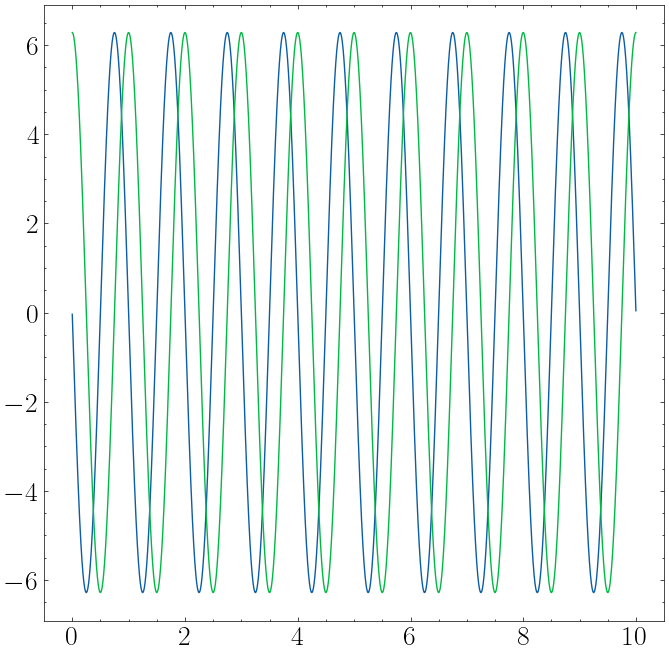

In [98]:
plt.figure(figsize=(8, 8))
plt.plot(np.arange(0,nsteps-1)*dt, vx, label='vx')
plt.plot(np.arange(0,nsteps-1)*dt, vy, label='vy')

In [89]:
vx**2 + vy**2, omega**2

(array([39.4784176, 39.4784176, 39.4784176, ..., 39.4784176, 39.4784176,
        39.4784176], shape=(9999,)),
 39.47841760435743)

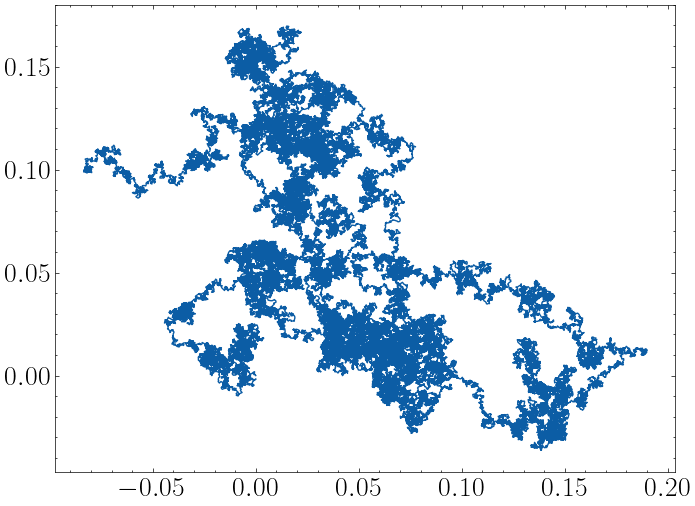

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_aspect('equal')
ax.plot(x0, y0, lw=1)